In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset 
data = pd.read_csv(r"C:\Users\Dell\Downloads\train.csv")
data

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15676,MSC_73047.0,I. Andante,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,Scale B,0.248399,-16.331,Female,Major,0.045251,123.516,Band,0.624518,Classical
15677,MSC_34472.0,Only Trust Your Heart,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,Scale F,0.681492,-25.087,Both,Major,0.448377,129.445,Duet,0.609022,Jazz
15678,MSC_32827.0,Moment's Notice,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,Scale D Sharp,0.416611,-10.246,Female,Major,0.040625,123.17,NaN,0.869294,Jazz
15679,MSC_89976.0,Such Small Scenes,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,Scale F,0.166336,-7.257,Both,Minor,0.060308,116.077,Duet,0.402700,Rock


## Basic informations

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [34]:
data.select_dtypes(include='object').nunique()

instance_id          15681
track_name           14799
key                     12
voice_gender             3
mode                     3
tempo                12332
musician_category        3
music_genre              7
dtype: int64

In [35]:
data.select_dtypes(include='float64').nunique()

popularity          12743
acousticness        15660
danceability        15125
duration_ms         14011
energy              14371
instrumentalness     9950
liveness            15681
loudness            10473
speechiness         15655
valence             15003
dtype: int64

In [5]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


In [6]:
data.isnull().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

## Data visualization

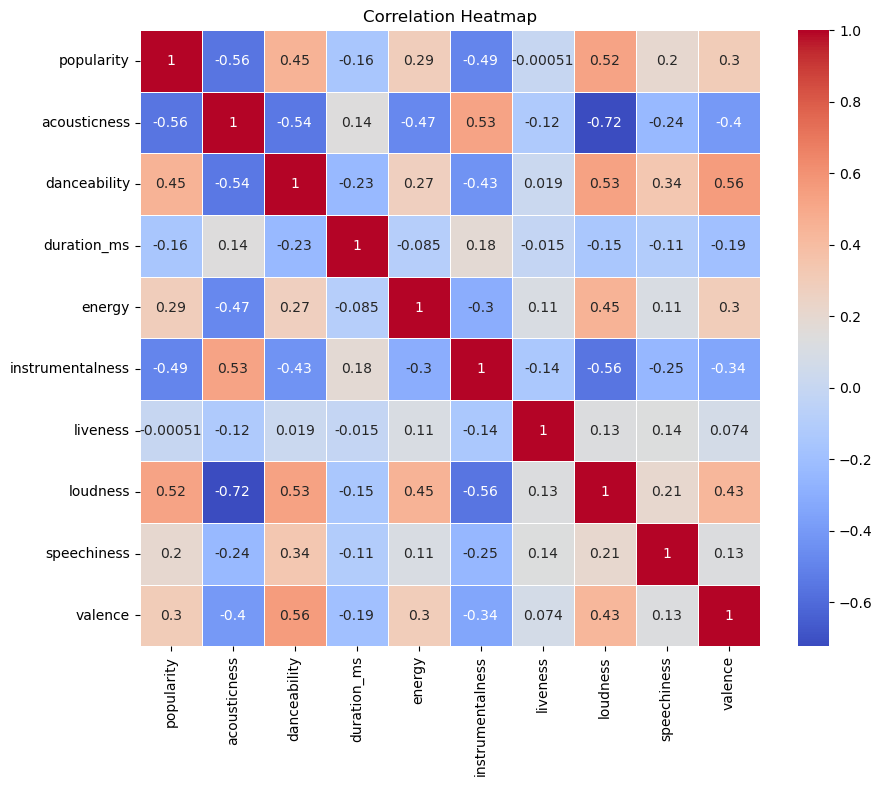

In [11]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

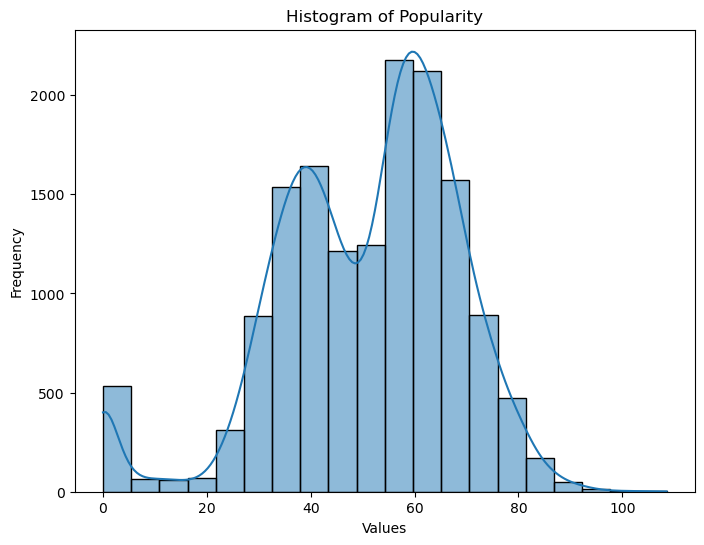

In [25]:
#  Histogram 
plt.figure(figsize=(8, 6))
sns.histplot(data['popularity'], bins=20, kde=True)
plt.title('Histogram of Popularity')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

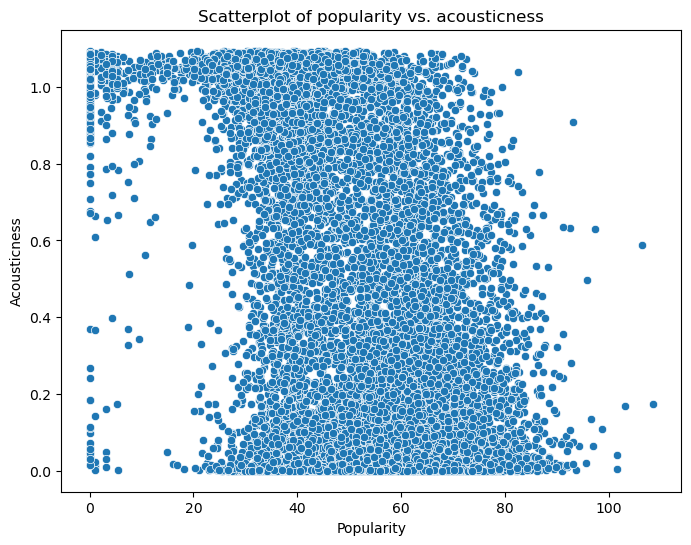

In [21]:
# Scatterplot for two numerical columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='popularity', y='acousticness', data=data)
plt.title('Scatterplot of popularity vs. acousticness')
plt.xlabel('Popularity')
plt.ylabel('Acousticness')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


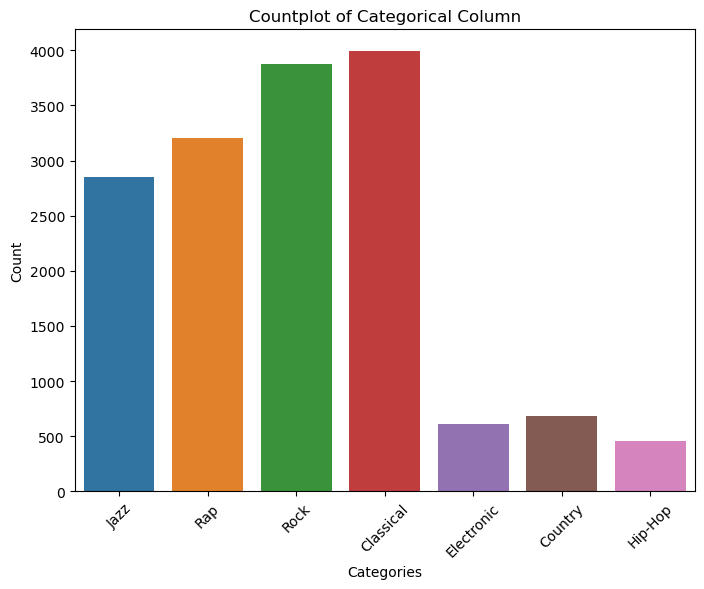

In [22]:
# Countplot-Music Genre
plt.figure(figsize=(8, 6))
sns.countplot(data['music_genre'])
plt.title('Countplot of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Countplot- Voice Gender
plt.figure(figsize=(8, 6))
sns.countplot(data['voice_gender'])
plt.title('Countplot of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


## Splitting into features and target

In [57]:
X = data.drop('popularity', axis=1)  
y = data['popularity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model training & evaluvation

In [61]:
model = SVC() 
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: could not convert string to float: 'MSC_21135.0'

## Fine tuning

In [64]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best Hyperparameters:")
print(best_params)


y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Best Model: {accuracy:.2f}')


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').